<a href="https://colab.research.google.com/github/kellyose/kellyose/blob/main/Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [44]:
#check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [45]:
#checking the descriptive statistics
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [46]:
#dropping the id column
df.drop('id', axis=1, inplace=True)

In [47]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [48]:
#bring out all the categorical variables
categorical_variables = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',	'smoking_status',	'stroke']
unique_values = {col:df[col].unique() for col in categorical_variables}
for col, values in unique_values.items():
  print(f"{col}: {values}")

gender: ['Male' 'Female' 'Other']
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: [1 0]


In [49]:
df.duplicated().sum()

0

In [50]:
y = df['stroke']
y.value_counts(normalize=True)*100

,proportion
stroke,
0,95.127202
1,4.872798


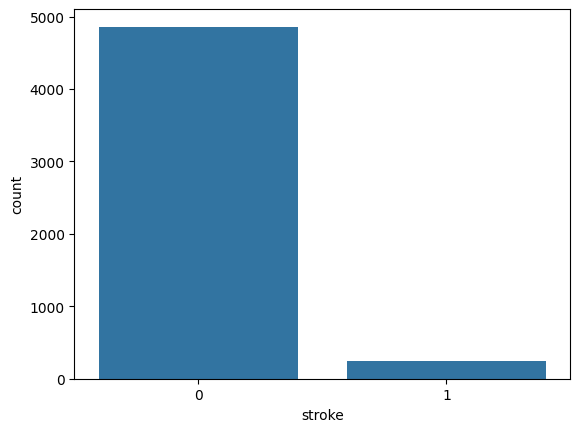

In [51]:
#ploting the value count to show the proportions
sns.countplot(x=y)
plt.show()




from the above diagram we can see that the dataset we have more people that do not have stroke than people that do have considering its our targer variable it means the dataset is not balanced

In [52]:
numerical_variables = ['age','avg_glucose_level','bmi']
df[numerical_variables].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


from the basic statistics we can see the highest value and the lowest we can see the count and its obvious that bmi has some missing value and that the mode and the mean from each numerical columns is showing skewness considering the mean and median values

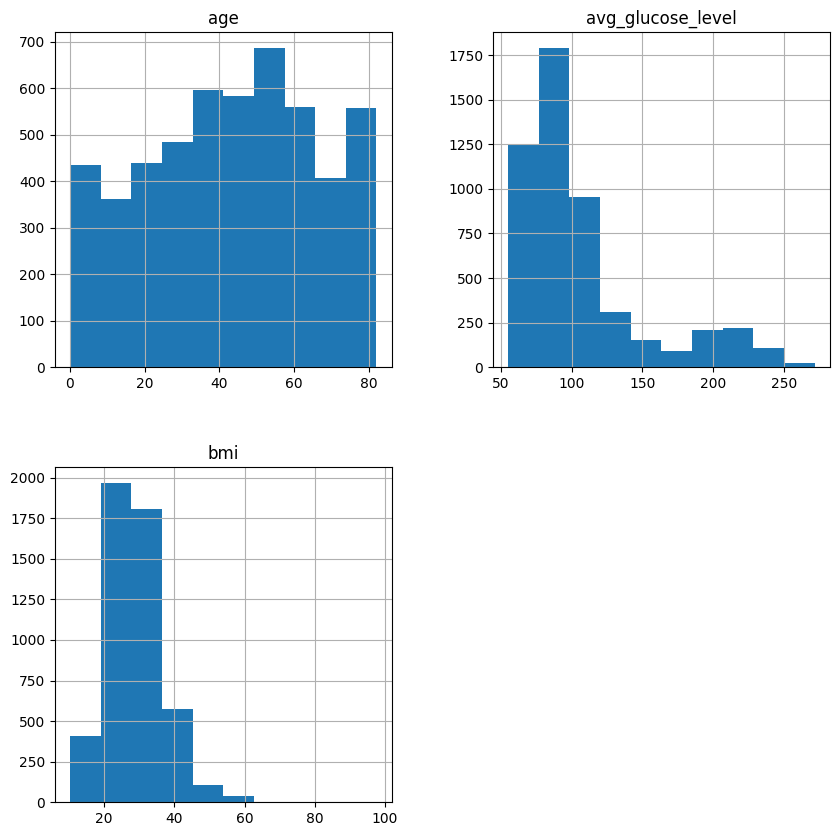

In [53]:
df[numerical_variables].hist(figsize=(10,10))
plt.show()

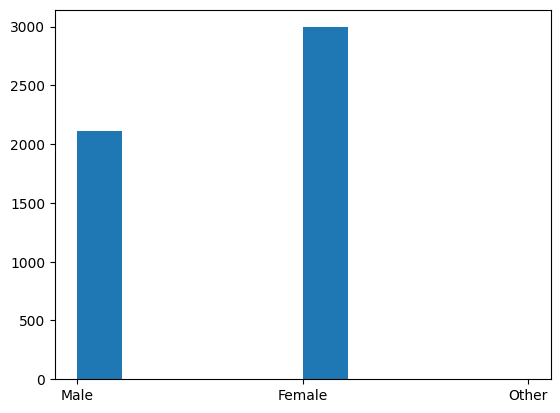

In [54]:
plt.hist(df['gender'])
plt.show()

from the above figure it is clear we have more female than male in the data set

In [55]:
round(df[df['gender'] == 'Male']['stroke'].mean()*100,2)

5.11

this shows that 5.11% of male experienced stroke

In [56]:
round(df[df['gender'] == 'Female']['stroke'].mean()*100,2)

4.71

whilw 4.71% of females experienced stroke

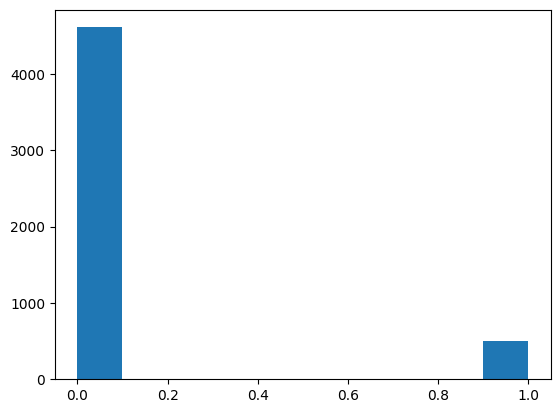

In [57]:
plt.hist(df['hypertension'])
plt.show()

from the above diagram we can see that most people in the dataset do not have hypertension because 0 denotes that no hypertension and 1 denotes the present of hypertension

In [58]:
round(df[df['hypertension'] == 1]['stroke'].mean()*100,2)

13.25

this shows that 13.25% of people with hypertension experienced stroke

In [59]:
round(df[df['hypertension'] == 0]['stroke'].mean()*100,2)

3.97

this shows that 13.25% of people without hypertension experienced stroke

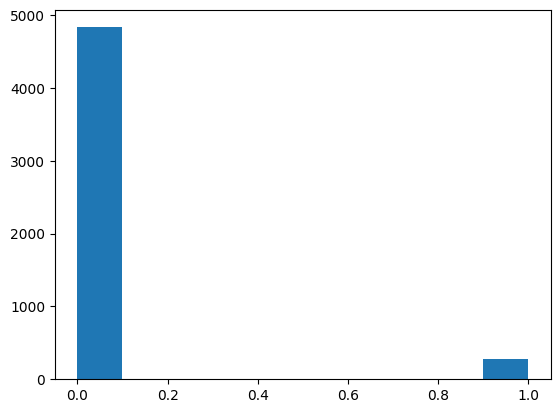

In [60]:
plt.hist(df['heart_disease'])
plt.show()

In [61]:
round(df[df['heart_disease'] == 0]['stroke'].mean()*100,2)

4.18

this shows that 4.18% of people without heart disease experienced stroke

In [62]:
round(df[df['heart_disease'] == 1]['stroke'].mean()*100,2)

17.03

this shows that 17.03% of people with heart disease experienced stroke

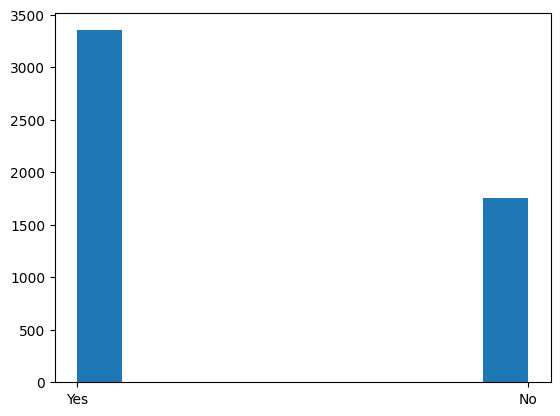

In [63]:
plt.hist(df['ever_married'])
plt.show()

In [64]:
round(df[df['ever_married'] == 0]['stroke'].mean()*100,2)

nan

In [65]:
round(df[df['ever_married'] == 1]['stroke'].mean()*100,2)

nan

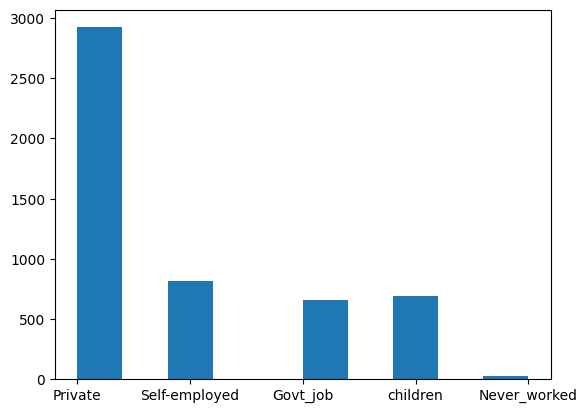

In [66]:
plt.hist(df['work_type'])
plt.show()

In [67]:
stroke_percentage_by_work_type = df.groupby('work_type')['stroke'].mean() * 100
stroke_percentage_by_work_type.sort_values(ascending=False)

,stroke
work_type,
Self-employed,7.936508
Private,5.094017
Govt_job,5.022831
children,0.291121
Never_worked,0.000000


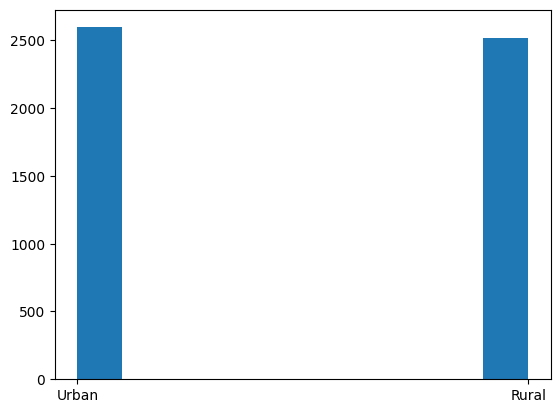

In [68]:
plt.hist(df['Residence_type'])
plt.show()

In [69]:
stroke_percentage_residence_type = df.groupby('Residence_type')['stroke'].mean() * 100
stroke_percentage_residence_type.sort_values(ascending=False)

,stroke
Residence_type,
Urban,5.200308
Rural,4.534606


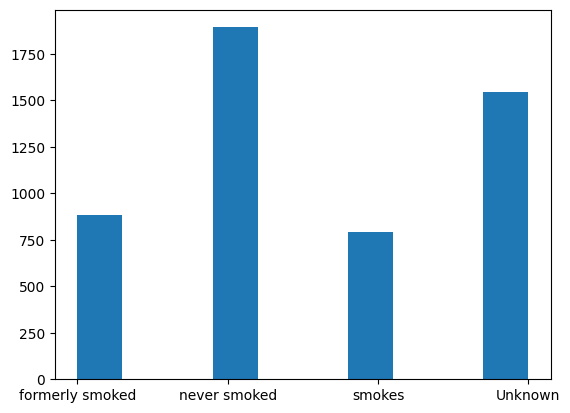

In [70]:
plt.hist(df['smoking_status'])
plt.show()

In [71]:
stroke_percentage_smoking_status = df.groupby('smoking_status')['stroke'].mean() * 100
stroke_percentage_smoking_status.sort_values(ascending=False)

,stroke
smoking_status,
formerly smoked,7.909605
smokes,5.323194
never smoked,4.756871
Unknown,3.044041


In [72]:
from sklearn.metrics import mutual_info_score

In [73]:
categorical_variables = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',	'smoking_status',	'stroke']
for col in categorical_variables:
  mi = mutual_info_score(df[col],df['stroke'])
  print(f"{col}: {mi:.2f}")

gender: 0.00
hypertension: 0.01
heart_disease: 0.01
ever_married: 0.01
work_type: 0.01
Residence_type: 0.00
smoking_status: 0.00
stroke: 0.19


In [74]:
df[numerical_variables + ['stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.333398,0.245257
avg_glucose_level,0.238171,1.000000,0.175502,0.131945
bmi,0.333398,0.175502,1.000000,0.042374
stroke,0.245257,0.131945,0.042374,1.000000


In [75]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


numerical = ['avg_glucose_level','bmi','age']
categorical = ['hypertension','heart_disease','ever_married','work_type','Residence_type',	'smoking_status']

transformer = ColumnTransformer(transformers=[
    ('num',Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),('power',PowerTransformer(method='yeo-johnson',standardize=True))]),numerical),
    ('cat',OneHotEncoder(),categorical)
])



In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def get_models():
  models,names = list(),list()
  models.append(LogisticRegression(solver='liblinear'))
  names.append('LR')
  models.append(LinearDiscriminantAnalysis())
  names.append('LDA')
  models.append(RandomForestClassifier(n_estimators=100))
  names.append('RF')
  return models,names

def evaluate_model(X,y,model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores


In [91]:
from imblearn.pipeline import Pipeline as IMBPipeline
y = df['stroke']
X = df.drop('stroke',axis=1)

models,names = get_models()
results = list()
for i in range(len(models)):
  pipeline = IMBPipeline(steps=[('transformer',transformer),('smote',SMOTE()),('model',models[i])])
  scores = evaluate_model(X, y, pipeline)
  results.append(scores)

  print('>%s: ROC-AUC = %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>LR: ROC-AUC = 0.836 (0.029)
>LDA: ROC-AUC = 0.837 (0.030)
>RF: ROC-AUC = 0.776 (0.027)


In [92]:
import pickle
with open('stroke_prediction_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)